In [2]:
import pandas as pd
import numpy as np

excel_file = 'Depressive data.xlsx'
data_raw = pd.read_excel(excel_file)
data_depressive = data_raw[:32017]


n = ['id', 'date', 'name', 'text', 'typr', 'rep', 'rtw', 'faw', 'stcount', 'foll', 'frien', 'listcount']
data_positive = pd.read_csv('data/positive.csv', sep=';', error_bad_lines=False, names=n, usecols=['text'])

raw_data = np.concatenate((data_positive['text'].values[:32017],
                           data_depressive['text'].values[:32017]), axis=0)
labels = [1] * 32017 + [0] * 32017

In [3]:
import re

def preprocess_text(text):
    text = text.lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
    text = re.sub('@[^\s]+', 'USER', text)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


data = [preprocess_text(t) for t in raw_data]

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2)

In [5]:
with open('messages.txt', 'w', encoding='utf-8') as f:
    for message in data:
        print(message, file=f)

In [6]:
messages = open('messages.txt').read().splitlines()

In [7]:
import pandas as pd
%matplotlib inline

preprocessed_data = pd.Series(messages).apply(lambda x: len(x.split()))
preprocessed_data.tail()

64029    20
64030    21
64031    46
64032    35
64033    35
dtype: int64

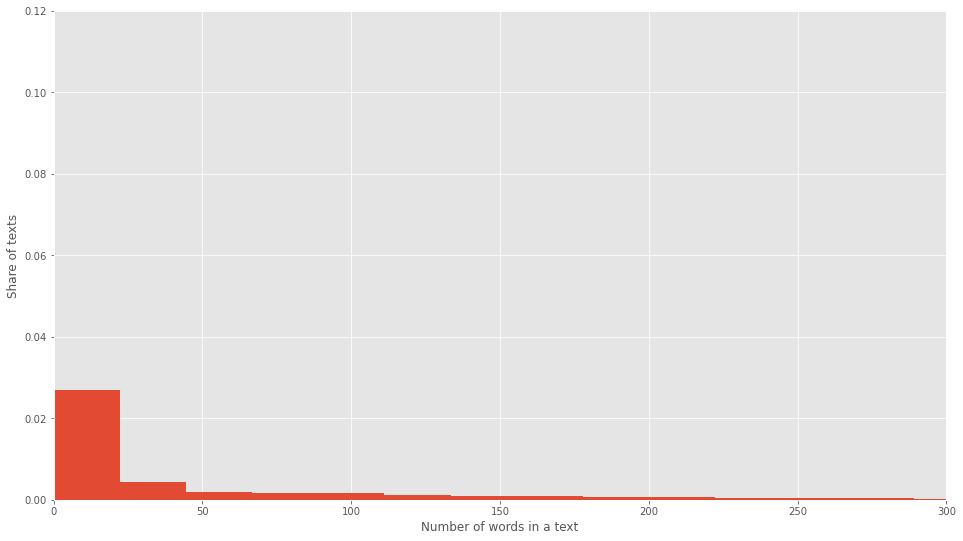

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(16, 9)) 
# facecolor='g'
n, bins, patches = plt.hist(preprocessed_data.values, 150, density=True)
plt.xlabel('Number of words in a text')
plt.ylabel('Share of texts')
plt.axis([0, 300, 0, 0.12])
plt.grid(True)
plt.show()

In [8]:
for i in range(5, 135, 1):
    preprocessed_data>i
    print("%0.5f for sentence_length=%r" % (1-(preprocessed_data>i).sum()/preprocessed_data.shape[0], i))

0.02778 for sentence_length=5
0.05263 for sentence_length=6
0.08892 for sentence_length=7
0.13857 for sentence_length=8
0.19066 for sentence_length=9
0.24267 for sentence_length=10
0.29117 for sentence_length=11
0.33463 for sentence_length=12
0.37374 for sentence_length=13
0.40938 for sentence_length=14
0.44055 for sentence_length=15
0.47002 for sentence_length=16
0.49764 for sentence_length=17
0.52180 for sentence_length=18
0.54482 for sentence_length=19
0.56503 for sentence_length=20
0.58411 for sentence_length=21
0.59996 for sentence_length=22
0.61339 for sentence_length=23
0.62515 for sentence_length=24
0.63387 for sentence_length=25
0.64114 for sentence_length=26
0.64628 for sentence_length=27
0.65064 for sentence_length=28
0.65468 for sentence_length=29
0.65762 for sentence_length=30
0.66091 for sentence_length=31
0.66405 for sentence_length=32
0.66658 for sentence_length=33
0.66922 for sentence_length=34
0.67183 for sentence_length=35
0.67508 for sentence_length=36
0.67820 for s

In [11]:
import logging
import multiprocessing
import gensim
from gensim.models import Word2Vec

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

data = gensim.models.word2vec.LineSentence('messages.txt')
model = Word2Vec(data, size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(
2020-04-22 22:19:04,807 : INFO : collecting all words and their counts
2020-04-22 22:19:04,809 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-22 22:19:04,914 : INFO : PROGRESS: at sentence #10000, processed 127640 words, keeping 25991 word types
2020-04-22 22:19:05,013 : INFO : PROGRESS: at sentence #20000, processed 253856 words, keeping 41408 word types
2020-04-22 22:19:05,107 : INFO : PROGRESS: at sentence #30000, processed 381267 words, keeping 54353 word types
2020-04-22 22:19:05,744 : INFO : PROGRESS: at sentence #40000, processed 1505255 words, keeping 92555 word types
2020-04-22 22:19:06,568 : INFO : PROGRESS: at sentence #50000, processed 2928088 words, keeping 119885 word types
2020-04-22 22:19:07,423

2020-04-22 22:28:04,744 : INFO : EPOCH 1 - PROGRESS: at 55.12% examples, 1232 words/s, in_qsize 8, out_qsize 0
2020-04-22 22:28:07,907 : INFO : EPOCH 1 - PROGRESS: at 55.22% examples, 1239 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:28:10,111 : INFO : EPOCH 1 - PROGRESS: at 55.33% examples, 1249 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:28:27,423 : INFO : EPOCH 1 - PROGRESS: at 55.47% examples, 1223 words/s, in_qsize 8, out_qsize 0
2020-04-22 22:28:30,085 : INFO : EPOCH 1 - PROGRESS: at 55.59% examples, 1230 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:28:33,970 : INFO : EPOCH 1 - PROGRESS: at 55.70% examples, 1235 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:28:37,155 : INFO : EPOCH 1 - PROGRESS: at 55.81% examples, 1242 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:28:55,080 : INFO : EPOCH 1 - PROGRESS: at 55.91% examples, 1216 words/s, in_qsize 8, out_qsize 0
2020-04-22 22:28:56,728 : INFO : EPOCH 1 - PROGRESS: at 56.01% examples, 1225 words/s, in_qsize 7, out_qsize 0
2

2020-04-22 22:36:02,927 : INFO : EPOCH 1 - PROGRESS: at 64.10% examples, 1238 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:36:07,438 : INFO : EPOCH 1 - PROGRESS: at 64.29% examples, 1247 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:36:21,383 : INFO : EPOCH 1 - PROGRESS: at 64.42% examples, 1238 words/s, in_qsize 8, out_qsize 0
2020-04-22 22:36:25,809 : INFO : EPOCH 1 - PROGRESS: at 64.52% examples, 1240 words/s, in_qsize 8, out_qsize 0
2020-04-22 22:36:31,282 : INFO : EPOCH 1 - PROGRESS: at 64.74% examples, 1248 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:36:44,833 : INFO : EPOCH 1 - PROGRESS: at 64.84% examples, 1239 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:36:48,966 : INFO : EPOCH 1 - PROGRESS: at 64.92% examples, 1241 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:36:50,308 : INFO : EPOCH 1 - PROGRESS: at 65.03% examples, 1246 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:36:54,074 : INFO : EPOCH 1 - PROGRESS: at 65.14% examples, 1249 words/s, in_qsize 7, out_qsize 0
2

2020-04-22 22:43:49,304 : INFO : EPOCH 1 - PROGRESS: at 72.91% examples, 1276 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:43:55,259 : INFO : EPOCH 1 - PROGRESS: at 73.00% examples, 1276 words/s, in_qsize 8, out_qsize 0
2020-04-22 22:44:07,768 : INFO : EPOCH 1 - PROGRESS: at 73.06% examples, 1271 words/s, in_qsize 8, out_qsize 0
2020-04-22 22:44:11,253 : INFO : EPOCH 1 - PROGRESS: at 73.24% examples, 1278 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:44:17,231 : INFO : EPOCH 1 - PROGRESS: at 73.36% examples, 1278 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:44:29,315 : INFO : EPOCH 1 - PROGRESS: at 73.47% examples, 1272 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:44:30,419 : INFO : EPOCH 1 - PROGRESS: at 73.58% examples, 1277 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:44:32,943 : INFO : EPOCH 1 - PROGRESS: at 73.66% examples, 1279 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:44:39,835 : INFO : EPOCH 1 - PROGRESS: at 73.75% examples, 1278 words/s, in_qsize 7, out_qsize 0
2

2020-04-22 22:51:46,589 : INFO : EPOCH 1 - PROGRESS: at 82.31% examples, 1293 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:51:50,433 : INFO : EPOCH 1 - PROGRESS: at 82.40% examples, 1295 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:51:52,332 : INFO : EPOCH 1 - PROGRESS: at 82.50% examples, 1297 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:51:58,967 : INFO : EPOCH 1 - PROGRESS: at 82.63% examples, 1296 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:52:06,860 : INFO : EPOCH 1 - PROGRESS: at 82.75% examples, 1295 words/s, in_qsize 8, out_qsize 0
2020-04-22 22:52:10,809 : INFO : EPOCH 1 - PROGRESS: at 82.87% examples, 1296 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:52:14,659 : INFO : EPOCH 1 - PROGRESS: at 82.97% examples, 1297 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:52:21,173 : INFO : EPOCH 1 - PROGRESS: at 83.10% examples, 1297 words/s, in_qsize 8, out_qsize 0
2020-04-22 22:52:28,111 : INFO : EPOCH 1 - PROGRESS: at 83.22% examples, 1296 words/s, in_qsize 8, out_qsize 0
2

2020-04-22 22:59:43,049 : INFO : EPOCH 1 - PROGRESS: at 89.44% examples, 1277 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:59:49,709 : INFO : EPOCH 1 - PROGRESS: at 89.49% examples, 1277 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:59:54,664 : INFO : EPOCH 1 - PROGRESS: at 89.55% examples, 1277 words/s, in_qsize 7, out_qsize 0
2020-04-22 22:59:59,984 : INFO : EPOCH 1 - PROGRESS: at 89.61% examples, 1278 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:00:04,168 : INFO : EPOCH 1 - PROGRESS: at 89.67% examples, 1278 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:00:12,969 : INFO : EPOCH 1 - PROGRESS: at 89.72% examples, 1277 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:00:17,713 : INFO : EPOCH 1 - PROGRESS: at 89.79% examples, 1277 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:00:24,666 : INFO : EPOCH 1 - PROGRESS: at 89.84% examples, 1277 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:00:27,432 : INFO : EPOCH 1 - PROGRESS: at 89.87% examples, 1278 words/s, in_qsize 7, out_qsize 0
2

2020-04-22 23:10:15,543 : INFO : EPOCH 2 - PROGRESS: at 52.04% examples, 1210 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:10:18,921 : INFO : EPOCH 2 - PROGRESS: at 52.15% examples, 1219 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:10:38,979 : INFO : EPOCH 2 - PROGRESS: at 52.25% examples, 1176 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:10:41,796 : INFO : EPOCH 2 - PROGRESS: at 52.47% examples, 1205 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:10:44,558 : INFO : EPOCH 2 - PROGRESS: at 52.60% examples, 1216 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:11:06,253 : INFO : EPOCH 2 - PROGRESS: at 52.70% examples, 1170 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:11:08,448 : INFO : EPOCH 2 - PROGRESS: at 52.90% examples, 1200 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:11:11,023 : INFO : EPOCH 2 - PROGRESS: at 53.01% examples, 1210 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:11:29,664 : INFO : EPOCH 2 - PROGRESS: at 53.08% examples, 1176 words/s, in_qsize 7, out_qsize 0
2

2020-04-22 23:19:46,634 : INFO : EPOCH 2 - PROGRESS: at 62.56% examples, 1218 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:19:48,539 : INFO : EPOCH 2 - PROGRESS: at 62.69% examples, 1224 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:19:50,943 : INFO : EPOCH 2 - PROGRESS: at 62.90% examples, 1237 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:20:10,110 : INFO : EPOCH 2 - PROGRESS: at 63.02% examples, 1220 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:20:13,596 : INFO : EPOCH 2 - PROGRESS: at 63.17% examples, 1223 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:20:16,232 : INFO : EPOCH 2 - PROGRESS: at 63.41% examples, 1235 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:20:36,948 : INFO : EPOCH 2 - PROGRESS: at 63.53% examples, 1217 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:20:42,767 : INFO : EPOCH 2 - PROGRESS: at 63.67% examples, 1217 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:20:44,743 : INFO : EPOCH 2 - PROGRESS: at 63.85% examples, 1230 words/s, in_qsize 7, out_qsize 0
2

2020-04-22 23:27:54,094 : INFO : EPOCH 2 - PROGRESS: at 70.94% examples, 1210 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:27:59,116 : INFO : EPOCH 2 - PROGRESS: at 71.06% examples, 1211 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:28:13,594 : INFO : EPOCH 2 - PROGRESS: at 71.14% examples, 1204 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:28:16,280 : INFO : EPOCH 2 - PROGRESS: at 71.24% examples, 1207 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:28:18,221 : INFO : EPOCH 2 - PROGRESS: at 71.33% examples, 1211 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:28:22,482 : INFO : EPOCH 2 - PROGRESS: at 71.46% examples, 1212 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:28:35,501 : INFO : EPOCH 2 - PROGRESS: at 71.54% examples, 1207 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:28:37,655 : INFO : EPOCH 2 - PROGRESS: at 71.63% examples, 1210 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:28:40,304 : INFO : EPOCH 2 - PROGRESS: at 71.72% examples, 1213 words/s, in_qsize 7, out_qsize 0
2

2020-04-22 23:36:32,252 : INFO : EPOCH 2 - PROGRESS: at 79.88% examples, 1206 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:36:35,670 : INFO : EPOCH 2 - PROGRESS: at 80.06% examples, 1211 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:36:54,019 : INFO : EPOCH 2 - PROGRESS: at 80.15% examples, 1204 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:36:56,266 : INFO : EPOCH 2 - PROGRESS: at 80.23% examples, 1206 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:36:59,532 : INFO : EPOCH 2 - PROGRESS: at 80.45% examples, 1212 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:37:17,366 : INFO : EPOCH 2 - PROGRESS: at 80.54% examples, 1205 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:37:18,723 : INFO : EPOCH 2 - PROGRESS: at 80.66% examples, 1208 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:37:20,705 : INFO : EPOCH 2 - PROGRESS: at 80.76% examples, 1210 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:37:22,956 : INFO : EPOCH 2 - PROGRESS: at 80.84% examples, 1213 words/s, in_qsize 7, out_qsize 0
2

2020-04-22 23:45:30,656 : INFO : EPOCH 2 - PROGRESS: at 88.90% examples, 1220 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:45:32,520 : INFO : EPOCH 2 - PROGRESS: at 88.93% examples, 1222 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:45:38,351 : INFO : EPOCH 2 - PROGRESS: at 88.98% examples, 1222 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:45:45,408 : INFO : EPOCH 2 - PROGRESS: at 89.04% examples, 1221 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:45:52,712 : INFO : EPOCH 2 - PROGRESS: at 89.11% examples, 1221 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:46:00,159 : INFO : EPOCH 2 - PROGRESS: at 89.20% examples, 1223 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:46:07,421 : INFO : EPOCH 2 - PROGRESS: at 89.27% examples, 1223 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:46:13,925 : INFO : EPOCH 2 - PROGRESS: at 89.35% examples, 1222 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:46:14,979 : INFO : EPOCH 2 - PROGRESS: at 89.44% examples, 1225 words/s, in_qsize 7, out_qsize 0
2

2020-04-22 23:55:49,625 : INFO : EPOCH 3 - PROGRESS: at 50.75% examples, 1110 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:55:50,633 : INFO : EPOCH 3 - PROGRESS: at 50.87% examples, 1130 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:56:13,614 : INFO : EPOCH 3 - PROGRESS: at 51.01% examples, 1076 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:56:14,873 : INFO : EPOCH 3 - PROGRESS: at 51.10% examples, 1093 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:56:17,847 : INFO : EPOCH 3 - PROGRESS: at 51.20% examples, 1106 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:56:36,358 : INFO : EPOCH 3 - PROGRESS: at 51.41% examples, 1091 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:56:40,455 : INFO : EPOCH 3 - PROGRESS: at 51.60% examples, 1120 words/s, in_qsize 8, out_qsize 0
2020-04-22 23:56:58,378 : INFO : EPOCH 3 - PROGRESS: at 51.82% examples, 1107 words/s, in_qsize 7, out_qsize 0
2020-04-22 23:57:05,909 : INFO : EPOCH 3 - PROGRESS: at 52.04% examples, 1123 words/s, in_qsize 8, out_qsize 0
2

2020-04-23 00:06:43,397 : INFO : EPOCH 3 - PROGRESS: at 62.30% examples, 1160 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:06:46,719 : INFO : EPOCH 3 - PROGRESS: at 62.43% examples, 1164 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:06:59,258 : INFO : EPOCH 3 - PROGRESS: at 62.56% examples, 1156 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:07:01,035 : INFO : EPOCH 3 - PROGRESS: at 62.68% examples, 1162 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:07:07,729 : INFO : EPOCH 3 - PROGRESS: at 62.81% examples, 1162 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:07:10,391 : INFO : EPOCH 3 - PROGRESS: at 62.90% examples, 1166 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:07:22,602 : INFO : EPOCH 3 - PROGRESS: at 63.02% examples, 1160 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:07:25,215 : INFO : EPOCH 3 - PROGRESS: at 63.17% examples, 1164 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:07:35,446 : INFO : EPOCH 3 - PROGRESS: at 63.29% examples, 1160 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 00:14:16,362 : INFO : EPOCH 3 - PROGRESS: at 70.68% examples, 1195 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:14:24,730 : INFO : EPOCH 3 - PROGRESS: at 70.77% examples, 1193 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:14:27,032 : INFO : EPOCH 3 - PROGRESS: at 70.86% examples, 1196 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:14:30,529 : INFO : EPOCH 3 - PROGRESS: at 70.94% examples, 1198 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:14:38,438 : INFO : EPOCH 3 - PROGRESS: at 71.06% examples, 1197 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:14:46,768 : INFO : EPOCH 3 - PROGRESS: at 71.14% examples, 1195 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:14:49,080 : INFO : EPOCH 3 - PROGRESS: at 71.24% examples, 1199 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:14:52,082 : INFO : EPOCH 3 - PROGRESS: at 71.33% examples, 1201 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:15:00,535 : INFO : EPOCH 3 - PROGRESS: at 71.46% examples, 1200 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 00:22:51,294 : INFO : EPOCH 3 - PROGRESS: at 80.76% examples, 1242 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:23:03,856 : INFO : EPOCH 3 - PROGRESS: at 80.84% examples, 1238 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:23:10,025 : INFO : EPOCH 3 - PROGRESS: at 80.93% examples, 1238 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:23:13,126 : INFO : EPOCH 3 - PROGRESS: at 81.19% examples, 1244 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:23:25,967 : INFO : EPOCH 3 - PROGRESS: at 81.29% examples, 1240 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:23:32,050 : INFO : EPOCH 3 - PROGRESS: at 81.41% examples, 1240 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:23:33,111 : INFO : EPOCH 3 - PROGRESS: at 81.51% examples, 1243 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:23:47,467 : INFO : EPOCH 3 - PROGRESS: at 81.76% examples, 1241 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:23:54,016 : INFO : EPOCH 3 - PROGRESS: at 81.87% examples, 1241 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 00:32:48,142 : INFO : EPOCH 3 - PROGRESS: at 89.72% examples, 1234 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:32:50,692 : INFO : EPOCH 3 - PROGRESS: at 89.79% examples, 1235 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:32:54,242 : INFO : EPOCH 3 - PROGRESS: at 89.84% examples, 1237 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:33:12,530 : INFO : EPOCH 3 - PROGRESS: at 89.92% examples, 1233 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:33:18,669 : INFO : EPOCH 3 - PROGRESS: at 90.02% examples, 1236 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:33:19,837 : INFO : EPOCH 3 - PROGRESS: at 90.06% examples, 1238 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:33:33,895 : INFO : EPOCH 3 - PROGRESS: at 90.13% examples, 1234 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:33:36,545 : INFO : EPOCH 3 - PROGRESS: at 90.17% examples, 1236 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:33:41,639 : INFO : EPOCH 3 - PROGRESS: at 90.22% examples, 1236 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 00:43:35,465 : INFO : EPOCH 4 - PROGRESS: at 52.60% examples, 1193 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:43:54,226 : INFO : EPOCH 4 - PROGRESS: at 52.70% examples, 1158 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:43:56,625 : INFO : EPOCH 4 - PROGRESS: at 52.80% examples, 1169 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:43:59,136 : INFO : EPOCH 4 - PROGRESS: at 53.01% examples, 1197 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:44:18,636 : INFO : EPOCH 4 - PROGRESS: at 53.12% examples, 1162 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:44:20,021 : INFO : EPOCH 4 - PROGRESS: at 53.20% examples, 1174 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:44:23,811 : INFO : EPOCH 4 - PROGRESS: at 53.43% examples, 1197 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:44:45,301 : INFO : EPOCH 4 - PROGRESS: at 53.54% examples, 1158 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:44:47,582 : INFO : EPOCH 4 - PROGRESS: at 53.70% examples, 1168 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 00:52:58,081 : INFO : EPOCH 4 - PROGRESS: at 62.56% examples, 1183 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:53:03,397 : INFO : EPOCH 4 - PROGRESS: at 62.68% examples, 1184 words/s, in_qsize 8, out_qsize 0
2020-04-23 00:53:07,896 : INFO : EPOCH 4 - PROGRESS: at 62.90% examples, 1194 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:53:21,218 : INFO : EPOCH 4 - PROGRESS: at 63.02% examples, 1186 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:53:26,091 : INFO : EPOCH 4 - PROGRESS: at 63.17% examples, 1187 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:53:30,430 : INFO : EPOCH 4 - PROGRESS: at 63.41% examples, 1197 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:53:43,296 : INFO : EPOCH 4 - PROGRESS: at 63.53% examples, 1190 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:53:47,415 : INFO : EPOCH 4 - PROGRESS: at 63.63% examples, 1192 words/s, in_qsize 7, out_qsize 0
2020-04-23 00:53:48,656 : INFO : EPOCH 4 - PROGRESS: at 63.77% examples, 1198 words/s, in_qsize 8, out_qsize 0
2

2020-04-23 01:01:11,253 : INFO : EPOCH 4 - PROGRESS: at 72.00% examples, 1239 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:01:19,158 : INFO : EPOCH 4 - PROGRESS: at 72.23% examples, 1242 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:01:22,828 : INFO : EPOCH 4 - PROGRESS: at 72.34% examples, 1244 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:01:30,426 : INFO : EPOCH 4 - PROGRESS: at 72.45% examples, 1243 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:01:32,294 : INFO : EPOCH 4 - PROGRESS: at 72.55% examples, 1246 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:01:39,615 : INFO : EPOCH 4 - PROGRESS: at 72.63% examples, 1245 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:01:43,457 : INFO : EPOCH 4 - PROGRESS: at 72.72% examples, 1247 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:01:50,940 : INFO : EPOCH 4 - PROGRESS: at 72.82% examples, 1246 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:02:00,781 : INFO : EPOCH 4 - PROGRESS: at 73.00% examples, 1247 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 01:08:49,497 : INFO : EPOCH 4 - PROGRESS: at 81.64% examples, 1289 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:08:52,339 : INFO : EPOCH 4 - PROGRESS: at 81.76% examples, 1291 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:08:59,841 : INFO : EPOCH 4 - PROGRESS: at 81.87% examples, 1290 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:09:09,725 : INFO : EPOCH 4 - PROGRESS: at 81.96% examples, 1287 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:09:10,879 : INFO : EPOCH 4 - PROGRESS: at 82.09% examples, 1290 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:09:14,274 : INFO : EPOCH 4 - PROGRESS: at 82.21% examples, 1292 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:09:21,176 : INFO : EPOCH 4 - PROGRESS: at 82.31% examples, 1291 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:09:30,884 : INFO : EPOCH 4 - PROGRESS: at 82.40% examples, 1288 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:09:32,093 : INFO : EPOCH 4 - PROGRESS: at 82.50% examples, 1291 words/s, in_qsize 8, out_qsize 0
2

2020-04-23 01:15:52,113 : INFO : EPOCH 4 - PROGRESS: at 89.15% examples, 1310 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:15:59,817 : INFO : EPOCH 4 - PROGRESS: at 89.20% examples, 1308 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:16:01,222 : INFO : EPOCH 4 - PROGRESS: at 89.35% examples, 1314 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:16:12,154 : INFO : EPOCH 4 - PROGRESS: at 89.44% examples, 1311 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:16:20,214 : INFO : EPOCH 4 - PROGRESS: at 89.49% examples, 1310 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:16:21,244 : INFO : EPOCH 4 - PROGRESS: at 89.55% examples, 1312 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:16:22,943 : INFO : EPOCH 4 - PROGRESS: at 89.61% examples, 1315 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:16:31,290 : INFO : EPOCH 4 - PROGRESS: at 89.67% examples, 1313 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:16:41,245 : INFO : EPOCH 4 - PROGRESS: at 89.74% examples, 1310 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 01:24:11,756 : INFO : EPOCH 5 - PROGRESS: at 50.87% examples, 1459 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:24:19,574 : INFO : EPOCH 5 - PROGRESS: at 51.01% examples, 1444 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:24:22,304 : INFO : EPOCH 5 - PROGRESS: at 51.10% examples, 1457 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:24:31,646 : INFO : EPOCH 5 - PROGRESS: at 51.20% examples, 1435 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:24:32,981 : INFO : EPOCH 5 - PROGRESS: at 51.30% examples, 1456 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:24:39,385 : INFO : EPOCH 5 - PROGRESS: at 51.41% examples, 1449 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:24:42,391 : INFO : EPOCH 5 - PROGRESS: at 51.52% examples, 1460 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:24:52,230 : INFO : EPOCH 5 - PROGRESS: at 51.62% examples, 1436 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:24:53,787 : INFO : EPOCH 5 - PROGRESS: at 51.70% examples, 1455 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 01:30:45,253 : INFO : EPOCH 5 - PROGRESS: at 59.32% examples, 1458 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:30:49,270 : INFO : EPOCH 5 - PROGRESS: at 59.45% examples, 1461 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:30:53,929 : INFO : EPOCH 5 - PROGRESS: at 59.56% examples, 1461 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:30:58,645 : INFO : EPOCH 5 - PROGRESS: at 59.66% examples, 1462 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:31:05,156 : INFO : EPOCH 5 - PROGRESS: at 59.76% examples, 1459 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:31:10,508 : INFO : EPOCH 5 - PROGRESS: at 59.82% examples, 1458 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:31:14,189 : INFO : EPOCH 5 - PROGRESS: at 59.93% examples, 1461 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:31:19,627 : INFO : EPOCH 5 - PROGRESS: at 60.00% examples, 1461 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:31:24,684 : INFO : EPOCH 5 - PROGRESS: at 60.11% examples, 1461 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 01:37:57,454 : INFO : EPOCH 5 - PROGRESS: at 68.71% examples, 1455 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:38:06,846 : INFO : EPOCH 5 - PROGRESS: at 68.84% examples, 1449 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:38:08,670 : INFO : EPOCH 5 - PROGRESS: at 68.96% examples, 1454 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:38:14,424 : INFO : EPOCH 5 - PROGRESS: at 69.06% examples, 1453 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:38:16,864 : INFO : EPOCH 5 - PROGRESS: at 69.12% examples, 1456 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:38:28,272 : INFO : EPOCH 5 - PROGRESS: at 69.23% examples, 1448 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:38:34,502 : INFO : EPOCH 5 - PROGRESS: at 69.45% examples, 1453 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:38:37,271 : INFO : EPOCH 5 - PROGRESS: at 69.56% examples, 1456 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:38:48,241 : INFO : EPOCH 5 - PROGRESS: at 69.66% examples, 1448 words/s, in_qsize 8, out_qsize 0
2

2020-04-23 01:44:56,518 : INFO : EPOCH 5 - PROGRESS: at 77.52% examples, 1456 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:45:02,461 : INFO : EPOCH 5 - PROGRESS: at 77.63% examples, 1455 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:45:06,534 : INFO : EPOCH 5 - PROGRESS: at 77.73% examples, 1456 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:45:14,819 : INFO : EPOCH 5 - PROGRESS: at 77.82% examples, 1453 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:45:21,784 : INFO : EPOCH 5 - PROGRESS: at 77.99% examples, 1456 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:45:27,290 : INFO : EPOCH 5 - PROGRESS: at 78.08% examples, 1455 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:45:35,476 : INFO : EPOCH 5 - PROGRESS: at 78.18% examples, 1452 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:45:41,306 : INFO : EPOCH 5 - PROGRESS: at 78.41% examples, 1456 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:45:47,755 : INFO : EPOCH 5 - PROGRESS: at 78.50% examples, 1455 words/s, in_qsize 7, out_qsize 0
2

2020-04-23 01:52:25,225 : INFO : EPOCH 5 - PROGRESS: at 86.73% examples, 1450 words/s, in_qsize 8, out_qsize 0
2020-04-23 01:52:32,021 : INFO : EPOCH 5 - PROGRESS: at 86.94% examples, 1453 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:52:33,786 : INFO : EPOCH 5 - PROGRESS: at 87.04% examples, 1455 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:52:45,943 : INFO : EPOCH 5 - PROGRESS: at 87.15% examples, 1450 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:52:52,343 : INFO : EPOCH 5 - PROGRESS: at 87.36% examples, 1453 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:52:54,067 : INFO : EPOCH 5 - PROGRESS: at 87.46% examples, 1455 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:53:06,320 : INFO : EPOCH 5 - PROGRESS: at 87.53% examples, 1450 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:53:12,734 : INFO : EPOCH 5 - PROGRESS: at 87.75% examples, 1453 words/s, in_qsize 7, out_qsize 0
2020-04-23 01:53:14,638 : INFO : EPOCH 5 - PROGRESS: at 87.84% examples, 1455 words/s, in_qsize 7, out_qsize 0
2

In [12]:
model.save("w2v/messages_model.w2v")

2020-04-23 09:31:13,318 : INFO : saving Word2Vec object under w2v/messages_model.w2v, separately None
2020-04-23 09:31:13,321 : INFO : not storing attribute vectors_norm
2020-04-23 09:31:13,323 : INFO : not storing attribute cum_table
2020-04-23 09:31:15,614 : INFO : saved w2v/messages_model.w2v


In [13]:
from gensim.models import Word2Vec

model = Word2Vec.load('w2v/messages_model.w2v')

2020-04-23 09:34:18,139 : INFO : loading Word2Vec object from w2v/messages_model.w2v
2020-04-23 09:34:19,520 : INFO : loading wv recursively from w2v/messages_model.w2v.wv.* with mmap=None
2020-04-23 09:34:19,522 : INFO : setting ignored attribute vectors_norm to None
2020-04-23 09:34:19,523 : INFO : loading vocabulary recursively from w2v/messages_model.w2v.vocabulary.* with mmap=None
2020-04-23 09:34:19,524 : INFO : loading trainables recursively from w2v/messages_model.w2v.trainables.* with mmap=None
2020-04-23 09:34:19,525 : INFO : setting ignored attribute cum_table to None
2020-04-23 09:34:19,527 : INFO : loaded w2v/messages_model.w2v


In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=33)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.rainbow(np.linspace(0, 1, clusters))
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], c=colors[classes[i]], alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.grid(True)
    plt.show()

In [23]:
labels = []
tokens = []
classes = []

samples = 15
for i, word in enumerate(['больно', 'работа', 'кофе', 'аэропорт', 'фильм', 'весело', 'обидеть', 'счастье', 'нравится', 'учеба']):
    tokens.append(model.wv[word])
    labels.append(word)
    classes.append(i)
    for similar_word, similarity in model.wv.most_similar(word, topn=20):
        tokens.append(model.wv[similar_word])
        labels.append(similar_word)
        classes.append(i)

2020-04-23 09:42:36,975 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:36,981 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:36,987 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:36,993 : WARNING : 'c' arg

2020-04-23 09:42:37,183 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,192 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,200 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,207 : WARNING : 'c' arg

2020-04-23 09:42:37,386 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,392 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,401 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,408 : WARNING : 'c' arg

2020-04-23 09:42:37,592 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,602 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,609 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,621 : WARNING : 'c' arg

2020-04-23 09:42:37,815 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,822 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,832 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:37,839 : WARNING : 'c' arg

2020-04-23 09:42:38,035 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,043 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,051 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,064 : WARNING : 'c' arg

2020-04-23 09:42:38,280 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,288 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,299 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,307 : WARNING : 'c' arg

2020-04-23 09:42:38,521 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,531 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,538 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,548 : WARNING : 'c' arg

2020-04-23 09:42:38,785 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2020-04-23 09:42:38,794 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


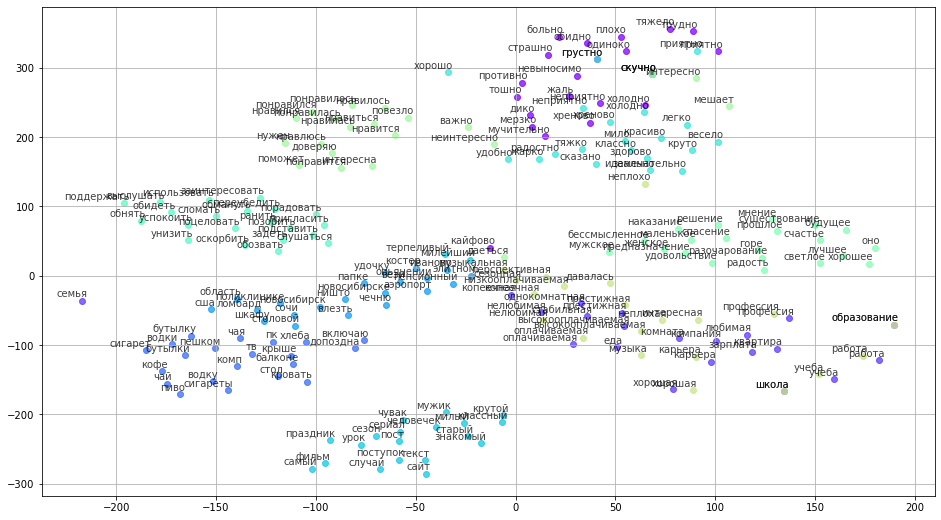

In [24]:
tsne_plot(labels, tokens, classes, samples)

In [25]:
import sys

sys.path

sys.executable

'c:\\users\\asus\\appdata\\local\\programs\\python\\python38\\python.exe'

In [26]:
from keras import backend as K


def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

Using TensorFlow backend.


In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

SENTENCE_LENGTH = 50
NUM = 100000

def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=SENTENCE_LENGTH)

tokenizer = Tokenizer(num_words=NUM)
tokenizer.fit_on_texts(x_train)

x_train_seq = get_sequences(tokenizer, x_train)
x_test_seq = get_sequences(tokenizer, x_test)

In [30]:
from gensim.models import Word2Vec
# Загружаем обученную модель
w2v_model = Word2Vec.load('w2v/messages_model.w2v')
DIM = w2v_model.vector_size 
# Инициализируем матрицу embedding слоя нулями
embedding_matrix = np.zeros((NUM, DIM))
# Добавляем NUM=100000 наиболее часто встречающихся слов из обучающей выборки в embedding слой
for word, i in tokenizer.word_index.items():
    if i >= NUM:
        break
    if word in w2v_model.wv.vocab.keys():
        embedding_matrix[i] = w2v_model.wv[word]

2020-04-23 09:53:31,159 : INFO : loading Word2Vec object from w2v/messages_model.w2v
2020-04-23 09:53:32,127 : INFO : loading wv recursively from w2v/messages_model.w2v.wv.* with mmap=None
2020-04-23 09:53:32,128 : INFO : setting ignored attribute vectors_norm to None
2020-04-23 09:53:32,130 : INFO : loading vocabulary recursively from w2v/messages_model.w2v.vocabulary.* with mmap=None
2020-04-23 09:53:32,131 : INFO : loading trainables recursively from w2v/messages_model.w2v.trainables.* with mmap=None
2020-04-23 09:53:32,132 : INFO : setting ignored attribute cum_table to None
2020-04-23 09:53:32,133 : INFO : loaded w2v/messages_model.w2v


In [31]:
from keras.layers import Input
from keras.layers.embeddings import Embedding

message_input = Input(shape=(SENTENCE_LENGTH,), dtype='int32')
message_encoder = Embedding(NUM, DIM, input_length=SENTENCE_LENGTH,
                          weights=[embedding_matrix], trainable=False)(message_input)

In [32]:
from keras import optimizers
from keras.layers import Dense, concatenate, Activation, Dropout
from keras.models import Model
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import GlobalMaxPooling1D

branches = []
x = Dropout(0.2)(message_encoder)

for size, filters_count in [(2, 10), (3, 10), (4, 10), (5, 10)]:
    for i in range(filters_count):
        branch = Conv1D(filters=1, kernel_size=size, padding='valid', activation='relu')(x)
        branch = GlobalMaxPooling1D()(branch)
        branches.append(branch)

x = concatenate(branches, axis=1)
x = Dropout(0.2)(x)
x = Dense(30, activation='relu')(x)
x = Dense(1)(x)
output = Activation('sigmoid')(x)

model = Model(inputs=[message_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[precision, recall, f1])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 200)      20000000    input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 50, 200)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 49, 1)        401         dropout_1[0][0]                  
____________________________________________________________________________________________

In [34]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("models/cnn/cnn-frozen-embeddings-{epoch:02d}-{val_f1:.2f}.hdf5", 
                             monitor='val_f1', save_best_only=True, mode='max', period=1)
history = model.fit(x_train_seq, y_train, batch_size=32, epochs=10, validation_split=0.25, callbacks = [checkpoint])

Train on 38420 samples, validate on 12807 samples
Epoch 1/10
38420/38420 [==============================] - 176s 5ms/step - loss: 0.1567 - precision: 0.9313 - recall: 0.9486 - f1: 0.9379 - val_loss: 0.1228 - val_precision: 0.9280 - val_recall: 0.9786 - val_f1: 0.9511
Epoch 2/10
38420/38420 [==============================] - 190s 5ms/step - loss: 0.1350 - precision: 0.9399 - recall: 0.9600 - f1: 0.9482 - val_loss: 0.1121 - val_precision: 0.9487 - val_recall: 0.9638 - val_f1: 0.9547
Epoch 3/10
38420/38420 [==============================] - 173s 5ms/step - loss: 0.1284 - precision: 0.9413 - recall: 0.9596 - f1: 0.9487 - val_loss: 0.1094 - val_precision: 0.9371 - val_recall: 0.9825 - val_f1: 0.9580
Epoch 4/10
38420/38420 [==============================] - 167s 4ms/step - loss: 0.1172 - precision: 0.9467 - recall: 0.9663 - f1: 0.9550 - val_loss: 0.1035 - val_precision: 0.9509 - val_recall: 0.9711 - val_f1: 0.9595
Epoch 5/10
38420/38420 [==============================] - 168s 4ms/step - loss

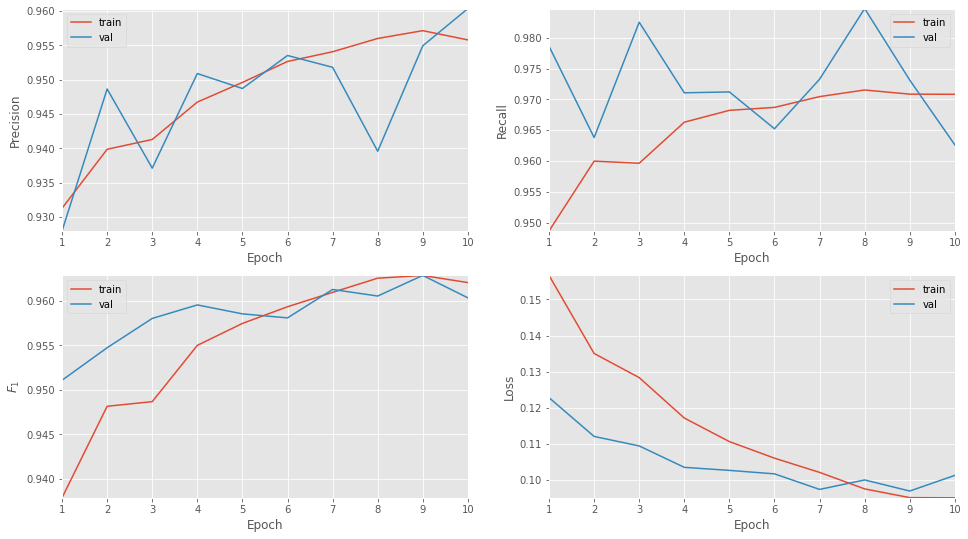

In [35]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


def plot_metrix(ax, x1, x2, title):
    ax.plot(range(1, len(x1) + 1), x1, label='train')
    ax.plot(range(1, len(x2) + 1), x2, label='val')
    ax.set_ylabel(title)
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.margins(0)


def plot_history(history):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))
    ax1, ax2, ax3, ax4 = axes.ravel()

    plot_metrix(ax1, history.history['precision'], history.history['val_precision'], 'Precision')
    plot_metrix(ax2, history.history['recall'], history.history['val_recall'], 'Recall')
    plot_metrix(ax3, history.history['f1'], history.history['val_f1'], "$F_1$")
    plot_metrix(ax4, history.history['loss'], history.history['val_loss'], 'Loss')

    plt.show()


plot_history(history)

In [36]:
model.load_weights('models/cnn/cnn-frozen-embeddings-09-0.96.hdf5')

In [37]:
from sklearn.metrics import classification_report

predicted = np.round(model.predict(x_test_seq))
print(classification_report(y_test, predicted, digits=5))

              precision    recall  f1-score   support

           0    0.97195   0.95813   0.96499      6329
           1    0.95965   0.97299   0.96627      6478

    accuracy                        0.96564     12807
   macro avg    0.96580   0.96556   0.96563     12807
weighted avg    0.96573   0.96564   0.96564     12807



In [38]:
from keras import optimizers

model.layers[1].trainable = True
adam = optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=[precision, recall, f1])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 200)      20000000    input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 50, 200)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 49, 1)        401         dropout_1[0][0]                  
____________________________________________________________________________________________

In [39]:
checkpoint = ModelCheckpoint("models/cnn/cnn-trainable-{epoch:02d}-{val_f1:.2f}.hdf5", 
                             monitor='val_f1', save_best_only=True, mode='max', period=1)

history_trainable = model.fit(x_train_seq, y_train, batch_size=32, epochs=5, validation_split=0.25, callbacks = [checkpoint])

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 38420 samples, validate on 12807 samples
Epoch 1/5
38420/38420 [==============================] - 758s 20ms/step - loss: 0.0814 - precision: 0.9628 - recall: 0.9771 - f1: 0.9690 - val_loss: 0.0860 - val_precision: 0.9565 - val_recall: 0.9759 - val_f1: 0.9651
Epoch 2/5
38420/38420 [==============================] - 770s 20ms/step - loss: 0.0737 - precision: 0.9654 - recall: 0.9788 - f1: 0.9711 - val_loss: 0.0806 - val_precision: 0.9583 - val_recall: 0.9812 - val_f1: 0.9687
Epoch 3/5
38420/38420 [==============================] - 806s 21ms/step - loss: 0.0661 - precision: 0.9688 - recall: 0.9815 - f1: 0.9743 - val_loss: 0.0773 - val_precision: 0.9622 - val_recall: 0.9784 - val_f1: 0.9693
Epoch 4/5
38420/38420 [==============================] - 755s 20ms/step - loss: 0.0612 - precision: 0.9710 - recall: 0.9823 - f1: 0.9759 - val_loss: 0.0743 - val_precision: 0.9635 - val_recall: 0.9812 - val_f1: 0.9714
Epoch 5/5
38420/38420 [==============================] - 774s 20ms/step - loss

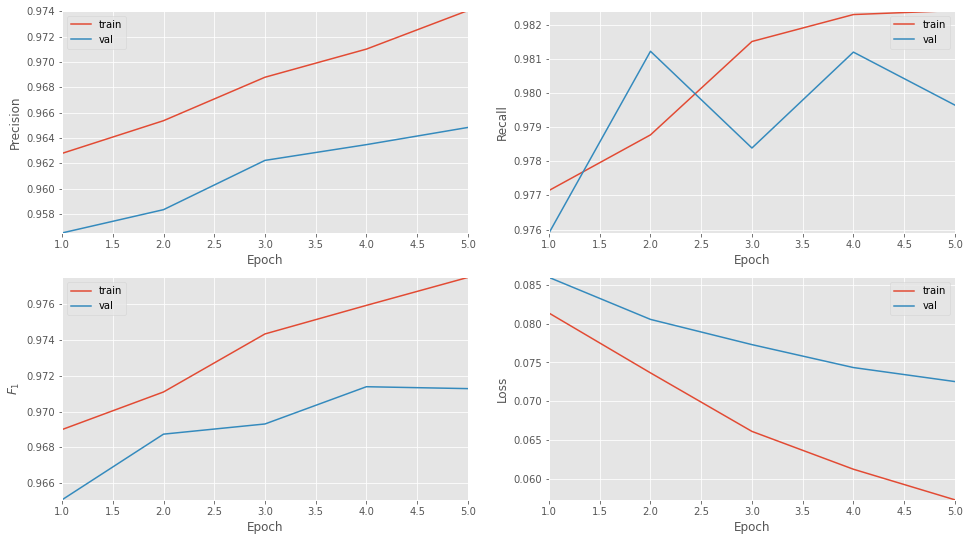

In [40]:
plot_history(history_trainable)

In [42]:
model.load_weights('models/cnn/cnn-trainable-04-0.97.hdf5')

In [43]:
predicted = np.round(model.predict(x_test_seq))
print(classification_report(y_test, predicted, digits=5))

              precision    recall  f1-score   support

           0    0.97708   0.96319   0.97008      6329
           1    0.96452   0.97793   0.97118      6478

    accuracy                        0.97064     12807
   macro avg    0.97080   0.97056   0.97063     12807
weighted avg    0.97073   0.97064   0.97064     12807

